<a href="https://colab.research.google.com/github/SP-TechForest/Python-creations/blob/main/ANN_ChurnModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd 
import numpy as np
import sklearn 
import plotly.express as px 
import tensorflow as tf
print(tf.__version__)

2.8.0


In [4]:
data = pd.read_csv("Churn_Modelling.csv")

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#Data Preprocessing

In [6]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
data.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

Do not need data preprocessing, data is accurate.  

#Feature selection and feature engineering

In [8]:
# Feature Selection
x = data.iloc[:,3:-1].values
y = data.iloc[:,-1]
x,y

(array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
        [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
        [502, 'France', 'Female', ..., 1, 0, 113931.57],
        ...,
        [709, 'France', 'Female', ..., 0, 1, 42085.58],
        [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
        [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object),
 0       1
 1       0
 2       1
 3       0
 4       0
        ..
 9995    0
 9996    0
 9997    1
 9998    1
 9999    0
 Name: Exited, Length: 10000, dtype: int64)

In [9]:
# Label encoding for gender
from sklearn.preprocessing import LabelEncoder
column_L = LabelEncoder()
x[:,2] = column_L.fit_transform(x[:,2]) 

In [10]:
# Onr hot encoding for geography columns
from os import XATTR_SIZE_MAX
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
oHe = OneHotEncoder()
ct = ColumnTransformer(transformers=[('encode',oHe,[1])],
                       remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [11]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [12]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Network implementation

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout
from tensorflow.keras import activations

In [14]:
# Initialize ANN network 
network = Sequential()

In [15]:
# Add input layer 
network.add(Dense(units=12, activation="relu"))

In [16]:
# Add hidden first layer
network.add(Dense(units=6, activation='relu'))
# Add second hidden layer 
network.add(Dense(units=4, activation='relu'))

In [17]:
# Add output Layer
network.add( Dense( units=1, activation=activations.relu))

In [18]:
# Compile model
network.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [19]:
# Model fitting 
network_history = network.fit(X_train, y_train, batch_size=10, epochs=80)

Epoch 1/80
800/800 [==============================] - 6s 2ms/step - loss: 1.1031 - accuracy: 0.7949
Epoch 2/80
800/800 [==============================] - 2s 2ms/step - loss: 0.4479 - accuracy: 0.8134
Epoch 3/80
800/800 [==============================] - 2s 2ms/step - loss: 0.4036 - accuracy: 0.8292
Epoch 4/80
800/800 [==============================] - 2s 2ms/step - loss: 0.3946 - accuracy: 0.8378
Epoch 5/80
800/800 [==============================] - 2s 2ms/step - loss: 0.3829 - accuracy: 0.8438
Epoch 6/80
800/800 [==============================] - 2s 2ms/step - loss: 0.3756 - accuracy: 0.8446
Epoch 7/80
800/800 [==============================] - 2s 2ms/step - loss: 0.3671 - accuracy: 0.8443
Epoch 8/80
800/800 [==============================] - 2s 2ms/step - loss: 0.3691 - accuracy: 0.8487
Epoch 9/80
800/800 [==============================] - 2s 2ms/step - loss: 0.3623 - accuracy: 0.8526
Epoch 10/80
800/800 [==============================] - 2s 2ms/step - loss: 0.3587 - accuracy: 0.8514

In [20]:
print(network_history.history.keys())

dict_keys(['loss', 'accuracy'])


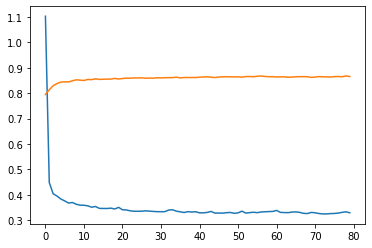

In [21]:
import matplotlib.pyplot as plt
plt.plot(network_history.history['loss'])
plt.plot(network_history.history['accuracy'])


In [22]:
y_pred = network.predict(X_test)


In [23]:
y_pred

array([[0.34073305],
       [0.31540516],
       [0.10018781],
       ...,
       [0.2851224 ],
       [0.20922886],
       [0.18528952]], dtype=float32)

In [24]:
y_pred = (y_pred >= 0.5)

In [25]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1487,  108],
       [ 175,  230]])

In [27]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [28]:
score

0.8585

#Try back propogation

In [29]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
num_data = data.select_dtypes(include = 'int64')

In [31]:
num_data.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,1,15634602,619,42,2,1,1,1,1
1,2,15647311,608,41,1,1,0,1,0
2,3,15619304,502,42,8,3,1,0,1
3,4,15701354,699,39,1,2,0,0,0
4,5,15737888,850,43,2,1,1,1,0


In [32]:
x_2 = num_data.iloc[:,2:-1].values
x_2

array([[619,  42,   2,   1,   1,   1],
       [608,  41,   1,   1,   0,   1],
       [502,  42,   8,   3,   1,   0],
       ...,
       [709,  36,   7,   1,   0,   1],
       [772,  42,   3,   2,   1,   0],
       [792,  28,   4,   1,   1,   0]])

In [33]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_2, y, test_size = 0.2, random_state = 0)

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [35]:
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return fs

In [36]:
fs = select_features(X_train2, y_train2, X_test2)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 6.573741
Feature 1: 702.454414
Feature 2: 5.471022
Feature 3: 23.052811
Feature 4: 1.212126
Feature 5: 186.048700


In [37]:
x_2[:,[1,3,5]]

array([[42,  1,  1],
       [41,  1,  1],
       [42,  3,  0],
       ...,
       [36,  1,  1],
       [42,  2,  0],
       [28,  1,  0]])

In [38]:
num_data.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,1,15634602,619,42,2,1,1,1,1
1,2,15647311,608,41,1,1,0,1,0
2,3,15619304,502,42,8,3,1,0,1
3,4,15701354,699,39,1,2,0,0,0
4,5,15737888,850,43,2,1,1,1,0


In [39]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


456891112

In [40]:
x_2 = data.iloc[:,[4,5,6,8,9,11,12]].values

In [41]:
x_2[:,1]

array(['Female', 'Female', 'Female', ..., 'Female', 'Male', 'Female'],
      dtype=object)

In [42]:
# Label encoding for gender
from sklearn.preprocessing import LabelEncoder
column_L = LabelEncoder()
x_2[:,1] = column_L.fit_transform(x_2[:,1]) 

In [43]:
x_2

array([['France', 0, 42, ..., 1, 1, 101348.88],
       ['Spain', 0, 41, ..., 1, 1, 112542.58],
       ['France', 0, 42, ..., 3, 0, 113931.57],
       ...,
       ['France', 0, 36, ..., 1, 1, 42085.58],
       ['Germany', 1, 42, ..., 2, 0, 92888.52],
       ['France', 0, 28, ..., 1, 0, 38190.78]], dtype=object)

In [44]:
from os import XATTR_SIZE_MAX
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
oHe = OneHotEncoder()
ct = ColumnTransformer(transformers=[('encode',oHe,[0])],
                       remainder='passthrough')
x_2 = np.array(ct.fit_transform(x_2))

In [45]:
x_2.shape

(10000, 9)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x_2, y, test_size = 0.2, random_state = 0)


In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
X_train.shape

(8000, 9)

In [49]:
# Initialize ANN network 
network2 = Sequential()

In [50]:
# Add input layer 
network2.add(Dense(units=9, activation="relu"))

In [51]:
# Add hidden first layer
network2.add(Dense(units=5, activation='relu'))
# Add second hidden layer 
network2.add(Dense(units=3, activation='relu'))

In [52]:
# Add output Layer
network2.add( Dense( units=1, activation=activations.sigmoid))

In [53]:
# Compile model
network2.compile(optimizer= 'rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])

In [54]:
# Model fitting 
network_history2 = network2.fit(X_train, y_train, batch_size=100, epochs=80)

Epoch 1/80
80/80 [==============================] - 1s 3ms/step - loss: 0.7229 - accuracy: 0.5099
Epoch 2/80
80/80 [==============================] - 0s 3ms/step - loss: 0.6460 - accuracy: 0.7824
Epoch 3/80
80/80 [==============================] - 0s 3ms/step - loss: 0.5866 - accuracy: 0.7965
Epoch 4/80
80/80 [==============================] - 0s 3ms/step - loss: 0.5231 - accuracy: 0.7960
Epoch 5/80
80/80 [==============================] - 0s 3ms/step - loss: 0.4858 - accuracy: 0.7960
Epoch 6/80
80/80 [==============================] - 0s 3ms/step - loss: 0.4669 - accuracy: 0.7960
Epoch 7/80
80/80 [==============================] - 0s 3ms/step - loss: 0.4527 - accuracy: 0.7960
Epoch 8/80
80/80 [==============================] - 0s 3ms/step - loss: 0.4411 - accuracy: 0.7960
Epoch 9/80
80/80 [==============================] - 0s 3ms/step - loss: 0.4321 - accuracy: 0.7969
Epoch 10/80
80/80 [==============================] - 0s 3ms/step - loss: 0.4239 - accuracy: 0.7996
Epoch 11/80
80/80 [

In [55]:
y_pred = network2.predict(X_test)


In [56]:
y_pred

array([[0.21775925],
       [0.19391121],
       [0.20709568],
       ...,
       [0.16612604],
       [0.17633143],
       [0.23589337]], dtype=float32)

In [57]:
y_pred = (y_pred >= 0.5)

In [58]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1506,   89],
       [ 192,  213]])

In [60]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [61]:
score

0.8595

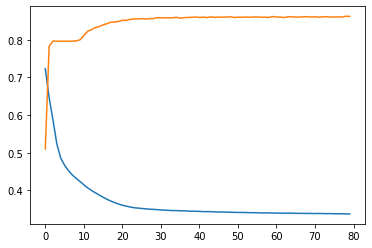

In [62]:
plt.plot(network_history2.history['loss'])
plt.plot(network_history2.history['accuracy'])